# Predict Diabetes using with ML

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score,KFold,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### Data Understanding
Id: Unique identifier for each data entry.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [2]:
#read data
df= pd.read_csv('Healthcare-Diabetes.csv')

In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns 

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df=df.drop(columns=["Id"])

In [6]:
print("dimension of data: {}".format(df.shape))

dimension of data: (2768, 9)


The diabetes dataset consists of 2768 data points, with 10 features each:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


"outcome" Is the feature that I will expect, 0 means no diabetes, 1 means presence

In [10]:
print(df.groupby('Outcome').size())

Outcome
0    1816
1     952
dtype: int64


500 is rated as 0 and 268 as 1:

In [11]:
df_0=df[df['Outcome']==0]
df_1=df[df['Outcome']==1]

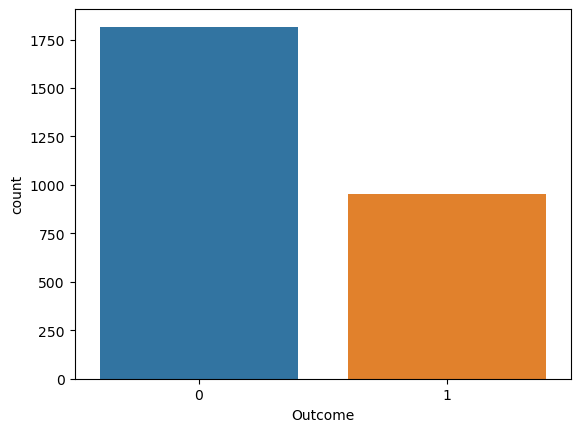

In [12]:
## The number of views in each categorical basket using bars.
sns.countplot(data= df , x='Outcome',label="Count")
plt.show()

#### Age

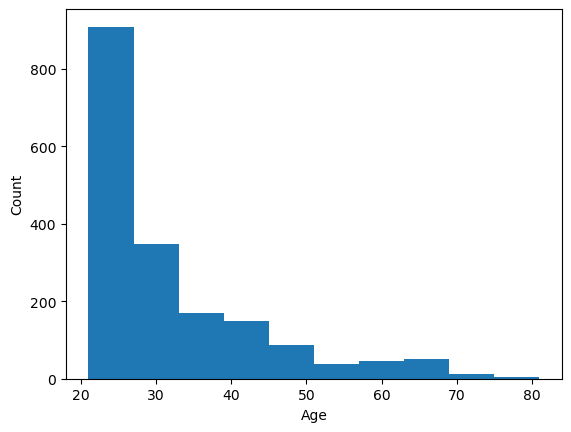

In [13]:
# histogram of the "Age" variable in the "Outcome=0" dataset 
plt.hist(df_0["Age"] )
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

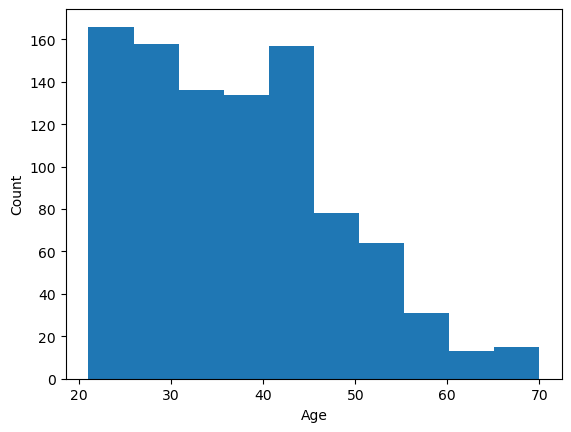

In [14]:
# histogram of the "Age" variable in the "Outcome=1" dataset 
plt.hist(df_1["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

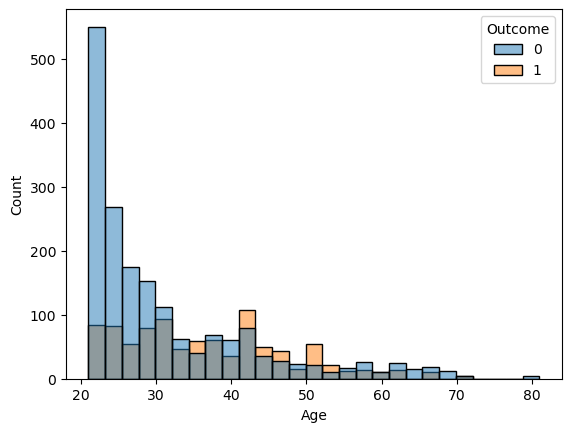

In [15]:
# histogram of the "Age"  
sns.histplot(data=df, x='Age'  , hue='Outcome')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

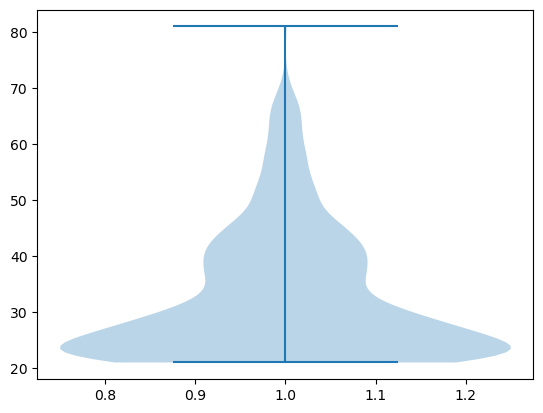

In [16]:
#plot Age
plt.violinplot(df['Age'])
plt.show()

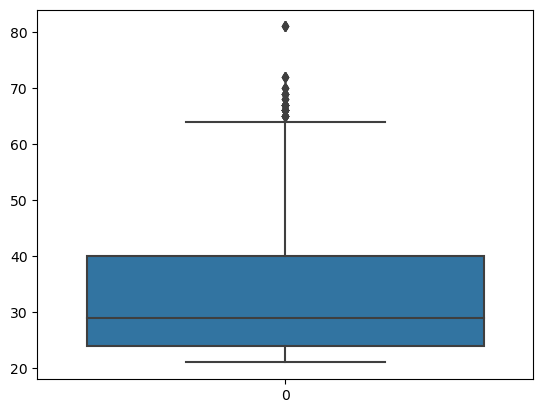

In [17]:
#boxplot Age
sns.boxplot(df['Age'])
plt.show()

In [18]:
df_0['Age'].mean()

31.11123348017621

In [19]:
df_1['Age'].mean()

36.98739495798319

###### The incidence of diabetes increases from the age of 36

#### SkinThickness

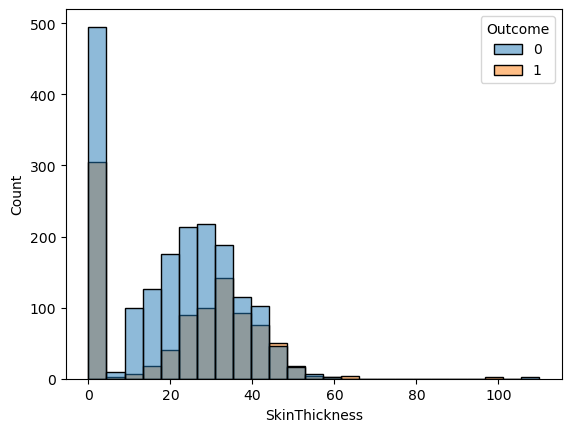

In [20]:
# histogram of the "SkinThickness"  
sns.histplot(data=df, x='SkinThickness'  , hue='Outcome')
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.show()

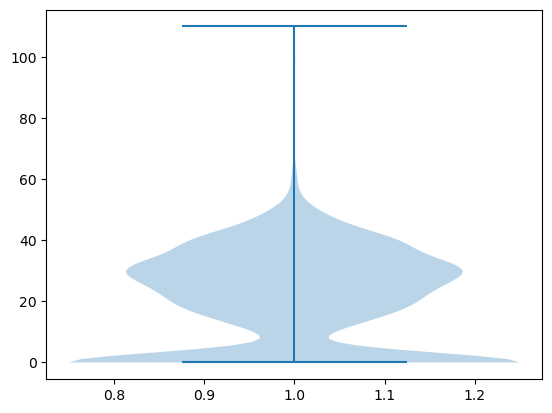

In [21]:
#violinplot SkinThickness
plt.violinplot(df['SkinThickness'])
plt.show()

In [22]:
# average healthy people  SkinThickness 
df_0['SkinThickness'].mean()


19.945484581497798

In [23]:
# max healthy people  SkinThickness 
df_0['SkinThickness'].max()


110

In [24]:
# average diabetics  SkinThickness 
df_1['SkinThickness'].mean()

22.501050420168067

In [25]:
# max diabetics  SkinThickness 
df_1['SkinThickness'].max()


99

###### The thickness of the skin of diabetics is higher than that of healthy people

#### BMI

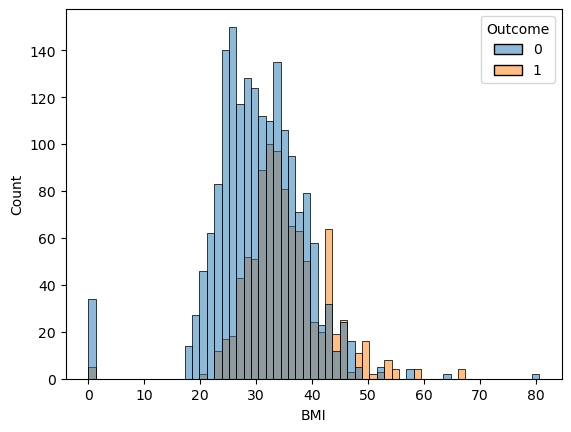

In [26]:
## histogram of the "BMi"  
sns.histplot(data=df, x='BMI'  , hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [27]:
# average healthy people  BMI 
df_0['BMI'].mean()

30.494988986784143

In [28]:
# max healthy people  BMI 
df_0['BMI'].max()

80.6

In [29]:
# average healthy people  BMI 
df_1['BMI'].mean()

35.270378151260495

In [30]:
# max healthy people  BMI 
df_1['BMI'].max()

67.1

###### BMI is more common in affected patients than in healthy people.

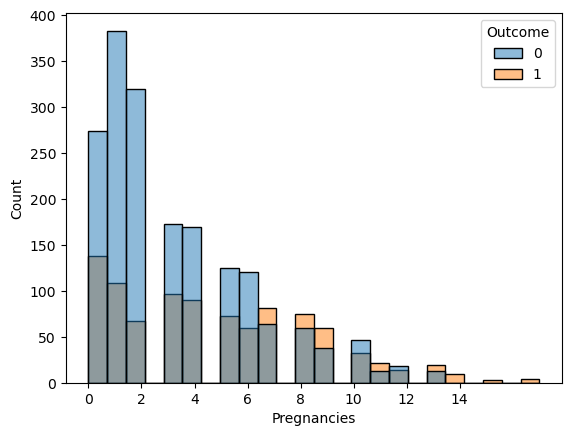

In [31]:
## histogram of the "Pregnancies"  
sns.histplot(data=df, x='Pregnancies', hue='Outcome')
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.xticks(range(0,15,2))
plt.show()

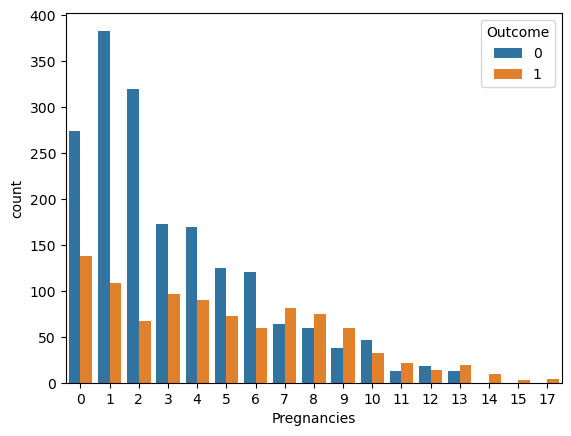

In [32]:
sns.countplot(data= df, x='Pregnancies',hue="Outcome")
plt.show()

In [33]:
# average healthy people  Pregnancies 
df_0['Pregnancies'].mean()

3.204295154185022

In [34]:
# max healthy people  Pregnancies 
df_0['Pregnancies'].max()

13

In [35]:
# average healthy people  Pregnancies 
df_1['Pregnancies'].mean()

4.769957983193278

In [36]:
# max healthy people  Pregnancies 
df_1['Pregnancies'].max()

17

###### The higher the number of pregnancies, the higher the incidence of diabetes

#### BMI

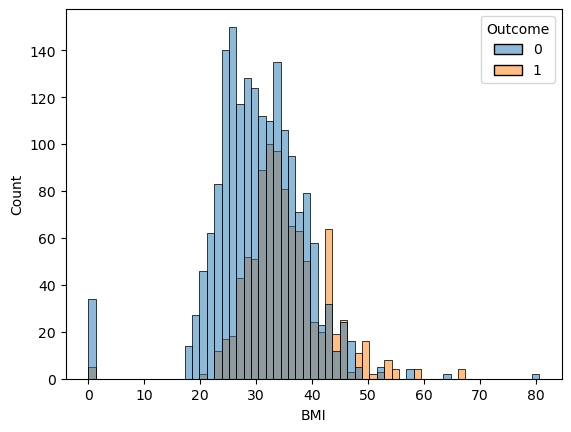

In [37]:
## histogram of the "BMI"  
sns.histplot(data=df, x='BMI', hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

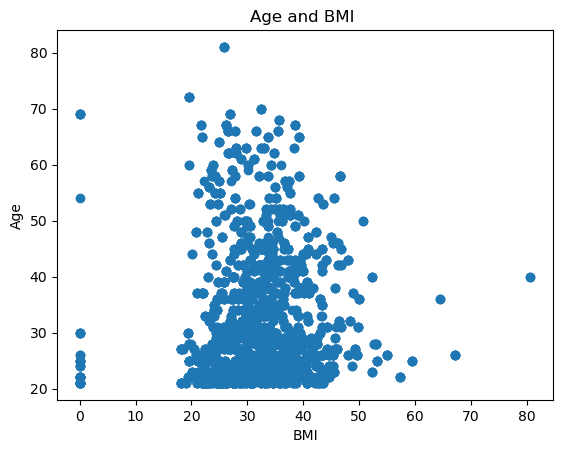

In [38]:
#scateer plot relationship between Age with BMI
plt.scatter (df["BMI"] , df["Age"] )
plt.title ("Age and BMI ")
plt.xlabel ('BMI' )
plt.ylabel ('Age')
plt.show ()

In [39]:
# average healthy people  BMI 
df_0['BMI'].mean()

30.494988986784143

In [40]:
# max healthy people  BMI 
df_0['BMI'].max()

80.6

In [41]:
# average healthy people  BMI 
df_1['BMI'].mean()

35.270378151260495

In [42]:
# max healthy people  BMI 
df_1['BMI'].max()

67.1

In [43]:
#to compare  correlation between a target  and other features in absolute 
correlations = df.corr()['Outcome'].drop('Outcome')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

Glucose                     0.460644
BMI                         0.280928
Age                         0.237050
Pregnancies                 0.223796
DiabetesPedigreeFunction    0.160664
Insulin                     0.123646
SkinThickness               0.075603
BloodPressure               0.072900
Name: Outcome, dtype: float64

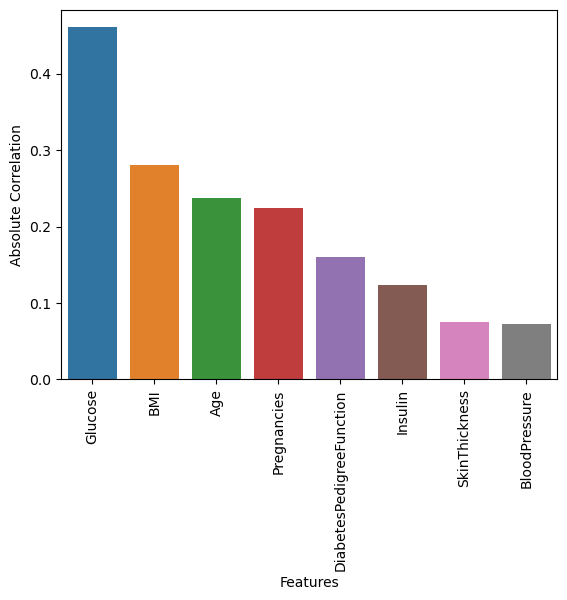

In [44]:
# show bar to compare correlation between a target and other features in absolute 
sns.barplot(x=sorted_correlations.index, y=sorted_correlations)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

###### We will train the model on the most important Features

In [45]:
df_corr = sorted_correlations[:6]
df_corr

Glucose                     0.460644
BMI                         0.280928
Age                         0.237050
Pregnancies                 0.223796
DiabetesPedigreeFunction    0.160664
Insulin                     0.123646
Name: Outcome, dtype: float64

In [46]:
df_corr=df[['Glucose',"BMI","Age",'Pregnancies','DiabetesPedigreeFunction',"Outcome"]]
df_corr

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Outcome
0,148,33.6,50,6,0.627,1
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,1
3,89,28.1,21,1,0.167,0
4,137,43.1,33,0,2.288,1
...,...,...,...,...,...,...
2763,75,29.7,33,2,0.370,0
2764,179,32.7,36,8,0.719,1
2765,85,31.2,42,6,0.382,0
2766,129,67.1,26,0,0.319,1


###### drop Outlier noise data

In [47]:
# Calculate the interquartile range (IQR) for each column
Q1 = df_corr.quantile(0.25)
Q3 = df_corr.quantile(0.75)
IQR = Q3 - Q1
# Identify  dataoutliers
outliers = df_corr[((df_corr < (Q1 - 1.5 * IQR)) | (df_corr > (Q3 + 1.5 * IQR))).any(axis=1)]
# drop  the outliers from the data
train_clean = df_corr.drop(outliers.index )

In [48]:
train_clean

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Outcome
0,148,33.6,50,6,0.627,1
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,1
3,89,28.1,21,1,0.167,0
5,116,25.6,30,5,0.201,0
...,...,...,...,...,...,...
2762,79,43.5,23,1,0.678,0
2763,75,29.7,33,2,0.370,0
2764,179,32.7,36,8,0.719,1
2765,85,31.2,42,6,0.382,0


Text(0.5, 1.0, 'Correlation data ')

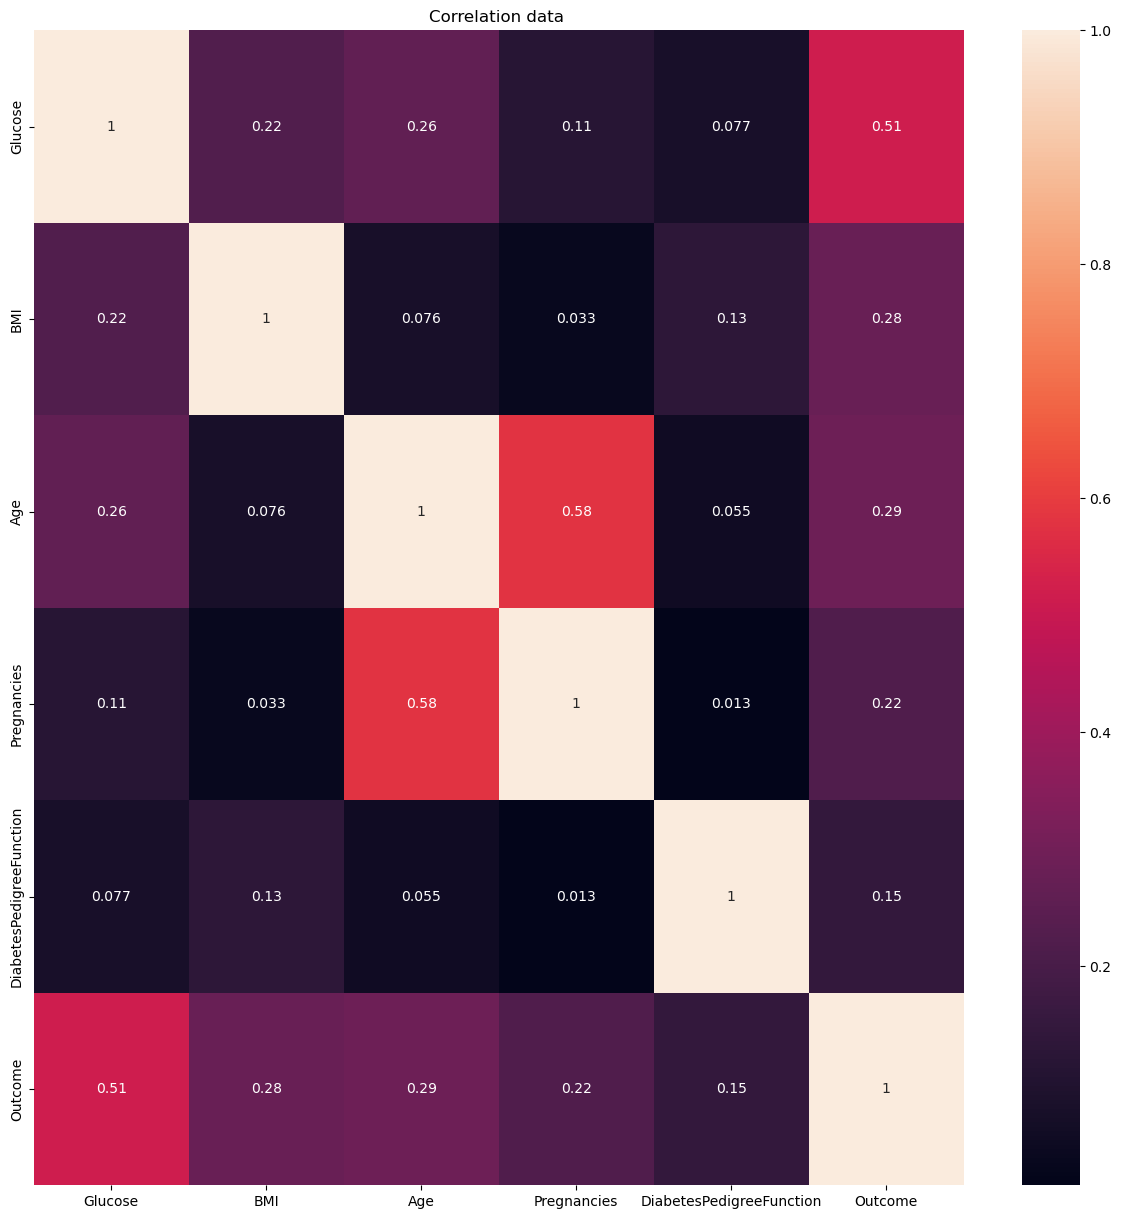

In [49]:
#visualizing the correlation between the variables in the diabetes 
plt.figure(figsize=(15,15))
sns.heatmap (np.abs(train_clean.corr()), annot = True  )
plt.title ("Correlation data " , fontsize = 12 )


In [50]:
X= train_clean.drop(columns=['Outcome']) # data
y= train_clean['Outcome']  #target

In [51]:
from sklearn.preprocessing import StandardScaler
Stand = StandardScaler()
x = pd.DataFrame(Stand.fit_transform(X) , columns=X.columns)

In [52]:
x

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction
0,0.906456,0.211912,1.657640,0.715276,0.759362
1,-1.203684,-0.863793,-0.129178,-0.831200,-0.326809
2,2.078756,-1.370911,-0.035135,1.333866,0.936455
3,-1.069707,-0.633285,-1.069609,-0.831200,-1.050923
4,-0.165361,-1.017465,-0.223221,0.405981,-0.917120
...,...,...,...,...,...
2503,-1.404650,1.733266,-0.881523,-0.831200,0.960067
2504,-1.538627,-0.387409,0.058908,-0.521905,-0.252037
2505,1.944779,0.073607,0.341037,1.333866,1.121419
2506,-1.203684,-0.156901,0.905296,0.715276,-0.204812


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [54]:
#create List models 
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

In [55]:
from sklearn.model_selection import train_test_split , cross_val_score,KFold,GridSearchCV
# calculate accuracy
scoring_=[]
name_m=[]
for i in range(len(models)):
    kfold = KFold(n_splits=10, shuffle=True, random_state=43)
    scor = cross_val_score(models[i][1], X, y, cv=kfold, scoring='accuracy')  
    scoring_.append(scor)
    name_m.append(models[i][0])
    print("{} : score {:.3f} ".format(models[i][0]  , np.mean(scoring_)  ))

KNN : score 0.855 
SVM : score 0.817 
DecisionTreeClassifier : score 0.876 
LogisticRegression : score 0.851 
RandomForestClassifier : score 0.880 


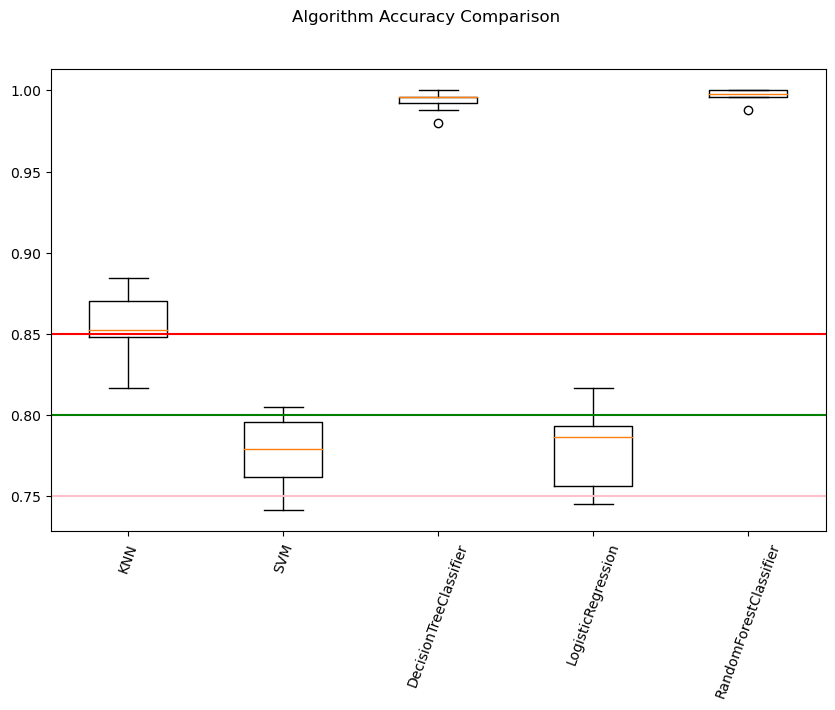

In [56]:
# visualization boxplot Algorithm Accuracy Comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scoring_)
plt.axhline(0.75, color='pink', linestyle='solid')
plt.axhline(0.80, color='green', linestyle='solid')
plt.axhline(0.85, color='red', linestyle='solid')
ax.set_xticklabels(name_m,rotation=70)
plt.show()

In [57]:
def confusion_matrix_sh(confusion_matrix, class_labels):
    # Normalize the confusion matrix
    confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    # Set up the figure
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    # Add labels to each cell
    thresh = confusion_matrix_normalized.max() / 2.0
    for i, j in np.ndindex(confusion_matrix.shape):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_normalized[i, j] > thresh else "black")
    # Set axis labels
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    # Show the plot
    plt.tight_layout()
    plt.show()

In [58]:
# function evaluation 
def evaluate(model,X,target): 
    #split the data into training and testing 
    X_train,X_test ,y_train , y_test=train_test_split(X , target ,test_size=0.25 , random_state=543 )
    model.fit(X_train , y_train)  # fit model     
    y_pred=model.predict(X_test)
    print("model: ",model)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    # Recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)
    # AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred)
    print("AUC-ROC:", auc_roc)
    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)
    report = classification_report(y_test, y_pred)
    print(report)

## K Nearest Neighbour predicted

It can be said that the Neighbors Nearest-k ,It is the simplest machine learning algorithm composed Build the model only from storing the training data set. To make a forecast for a new point in a group data, the algorithm finds the closest data points in the training data set

First, let's see if we can confirm the relationship between model complexity and accuracy:

In [59]:
#split data into train ,split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=543)

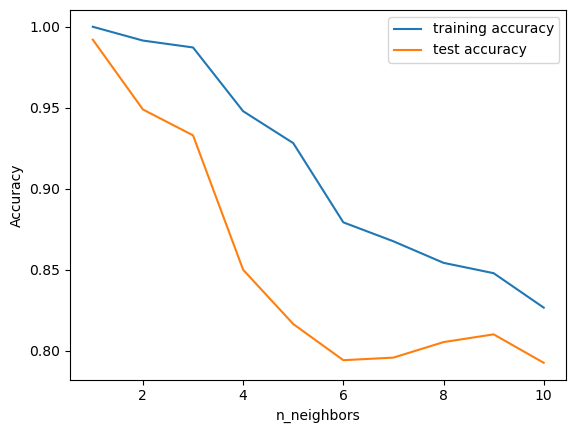

In [60]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # bulding nodel
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [61]:
## check   accuracy of the k-nearest neighbors
evaluate(KNeighborsClassifier(n_neighbors=2), X,y)

model:  KNeighborsClassifier(n_neighbors=2)
Accuracy: 0.94896331738437
Precision: 0.9943820224719101
Recall: 0.8509615384615384
F1 Score: 0.917098445595855
AUC-ROC: 0.9242874518083347
Confusion Matrix:
 [[418   1]
 [ 31 177]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       419
           1       0.99      0.85      0.92       208

    accuracy                           0.95       627
   macro avg       0.96      0.92      0.94       627
weighted avg       0.95      0.95      0.95       627



## LogisticRegression for predicting diabetes

In [62]:
## We check   accuracy of the Logistic Regression
evaluate(LogisticRegression(), X,y)

model:  LogisticRegression()
Accuracy: 0.7767145135566188
Precision: 0.7236842105263158
Recall: 0.5288461538461539
F1 Score: 0.6111111111111112
AUC-ROC: 0.7143037451808335
Confusion Matrix:
 [[377  42]
 [ 98 110]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       419
           1       0.72      0.53      0.61       208

    accuracy                           0.78       627
   macro avg       0.76      0.71      0.73       627
weighted avg       0.77      0.78      0.77       627



## support vector machine

In [63]:
model=SVC()
model.fit(X_train , y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7655502392344498


In [64]:
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
param_grid = {'C': [0.1, 1, 10,100,1000,10000], 'gamma': [0.0001,0.001,0.01, 0.1, 1,10,100,1000]}
# Create an instance of the model
model = SVC()
# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
# Fit the GridSearchCV 
grid_search.fit(X_train, y_train)
# Get the best parameter 
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
# Evaluate the model with the best parameters 
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
# Print the results
print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)
print("Test Accuracy: ", test_accuracy)

Best Parameters:  {'C': 10000, 'gamma': 0.01}
Best Accuracy:  0.922387342573541
Test Accuracy:  0.9984051036682615


In [65]:
## check   accuracy of the  SVC
evaluate(grid_search,X,y)

model:  GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})
Accuracy: 0.9984051036682615
Precision: 0.9952153110047847
Recall: 1.0
F1 Score: 0.9976019184652278
AUC-ROC: 0.9988066825775656
Confusion Matrix:
 [[418   1]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       419
           1       1.00      1.00      1.00       208

    accuracy                           1.00       627
   macro avg       1.00      1.00      1.00       627
weighted avg       1.00      1.00      1.00       627



## Decision tree classifier

In [66]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train))) # To calculate the accuracy of the training data
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))   # To calculate the accuracy of the test data

Accuracy on training set: 1.000
Accuracy on test set: 0.995


The accuracy on the training set using the decision tree classifier is 100

While the accuracy of the test set is much worse. This is an indication that the tree is suffering from over-adjustment


overfitting , It does not generalize well to new data. Therefore, we need to apply pre-pruning
  on the tree

Now I will do it again by setting
3 = depth_m
Which reduces the depth of the tree.
This leads to a lower accuracy in the training set, but improves the test set. 

In [67]:
## We check   accuracy of the  Decision tree classifier algorithm for predicting diabetes
model_tree= DecisionTreeClassifier(criterion="entropy", max_depth = 3,ccp_alpha=2,min_samples_split=5)
evaluate(model_tree, X,y)

model:  DecisionTreeClassifier(ccp_alpha=2, criterion='entropy', max_depth=3,
                       min_samples_split=5)
Accuracy: 0.6682615629984051
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5
Confusion Matrix:
 [[419   0]
 [208   0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       419
           1       0.00      0.00      0.00       208

    accuracy                           0.67       627
   macro avg       0.33      0.50      0.40       627
weighted avg       0.45      0.67      0.54       627



### RandomForestClassifier

In [68]:
evaluate(RandomForestClassifier(),X,y)

model:  RandomForestClassifier()
Accuracy: 0.9920255183413078
Precision: 1.0
Recall: 0.9759615384615384
F1 Score: 0.9878345498783455
AUC-ROC: 0.9879807692307692
Confusion Matrix:
 [[419   0]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       419
           1       1.00      0.98      0.99       208

    accuracy                           0.99       627
   macro avg       0.99      0.99      0.99       627
weighted avg       0.99      0.99      0.99       627

